## Импорт датасета

Импортируем указанные библиотеки под сокращенным именем для удобства.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Загружаем наш подготовленный датасет.

In [6]:
df = pd.read_csv('University_prep.csv', sep=';')
df

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Citations,GDP,Industry_Income
0,20664.0,11.2,8472.0,0.46,0.54,90.5,98.4,41627.0,65.5
1,2240.0,6.4,672.0,0.34,0.66,92.1,97.9,60236.0,88.0
2,18978.0,10.9,7022.0,0.47,0.53,91.4,95.8,41627.0,59.3
3,16135.0,7.3,3711.0,0.43,0.57,92.8,99.9,60236.0,66.2
4,11247.0,8.6,3824.0,0.39,0.61,90.5,99.5,60236.0,86.9
...,...,...,...,...,...,...,...,...,...
1351,20174.0,17.8,0.0,0.55,0.45,16.2,6.1,14064.0,35.6
1352,34101.0,21.3,0.0,0.57,0.43,15.3,6.7,14064.0,35.1
1353,15236.0,11.1,3.0,0.63,0.37,17.0,4.5,28053.0,36.9
1354,17101.0,24.9,0.0,0.54,0.46,13.8,7.6,14064.0,35.0


## Корреляционная матрица

Снова выведем эту матрицу, но уже с удалёнными переременными.

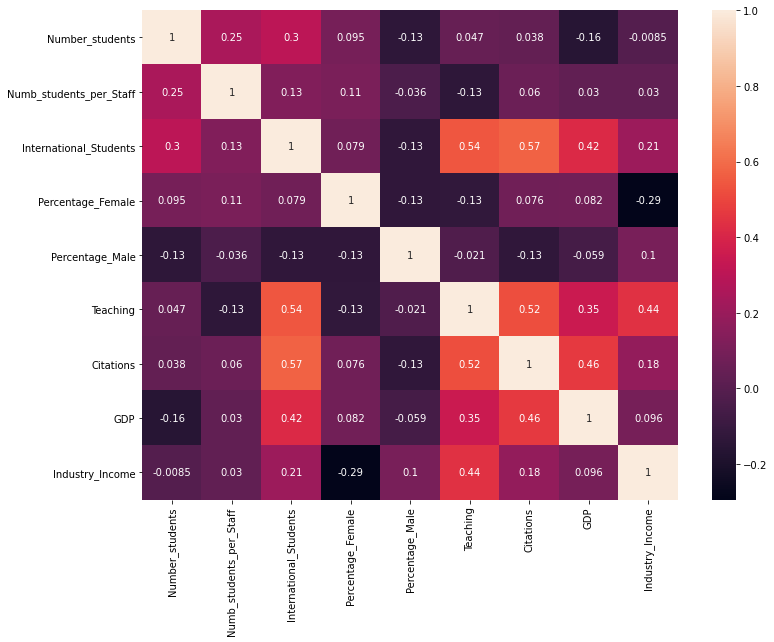

In [7]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

## Разбиение

Поделим датасет на обучающую train (80%) и тестовую test (20%) выборки. В Х запишем все переменные, кроме зависимой. У нас таковой является доход (Industry_Income). Его мы запишем в Y.

In [8]:
X = df.iloc[:, :-1]
y = df['Industry_Income']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Простая линейная регрессия

Преподавание(Teaching) имеет самое сильное влияние на Industry_Income (см. Корреляционную матрицу), поэтому его мы и будем использовать для простой линейной регрессии.

In [9]:
f1 = ['Teaching']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

sr.coef_, sr.intercept_

(array([0.50357519]), 32.30548865484572)

Прогнозируем данные для тестовой выборки.Вычисляем коэффициент детерминации. Видим, что он достаточно низкий. Хотя пока рано что-либо конкретно говорить, так как не с чем сравнивать.

In [10]:
y_pred = sr.predict(X_test[f1])

sr.score(X_train[f1], y_train).round(3)

0.187

Теперь находим среднеквадратические ошибки для обучающей и тестовой выборки. Модель немного переобучена, но не критично.

In [11]:
 from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(14.57, 14.65)

Визуализируем результат. Видим, что модель плохо описывает данные. Вывод пока один-проводим исследование дальше.

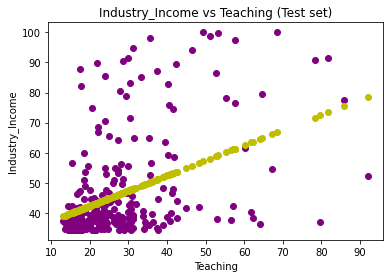

In [12]:
plt.scatter(X_test['Teaching'], y_test, color = 'purple')
plt.plot(X_test['Teaching'], sr.predict(X_test[f1]), 'yo')
plt.title('Industry_Income vs Teaching (Test set)')
plt.xlabel('Teaching')
plt.ylabel('Industry_Income')
plt.show()

### Промежуточный вывод: ожидаемо, что простая линейная регрессия плохо объясняет наши данные (18%), но отмечу, что эта модель наименее переобучена. Строили мы её исходя из того, что на доход влияет преподавание. Я считаю, что эта модель слишком простая для нашего исследования.

## Множественная линейная регрессия

!pip install statsmodels

Пробуем построить множественную линейную регрессию.Коєффициент детерминации увеличился на 10%, что является позитивным моментом.

In [16]:
mr = LinearRegression().fit(X_train, y_train)

mr.score(X_train, y_train).round(3)

0.288

Визуализируем результат. Модель уже лучше описывает данные.

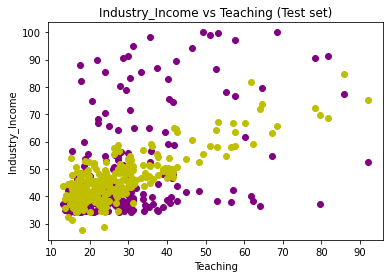

In [17]:
plt.scatter(X_test['Teaching'], y_test, color = 'purple')
plt.plot(X_test['Teaching'], mr.predict(X_test), 'yo')
plt.title('Industry_Income vs Teaching (Test set)')
plt.xlabel('Teaching')
plt.ylabel('Industry_Income')
plt.show()

## p-values

С помощью данной операции выбираем наиболее значимые для нас переменные.

In [18]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Industry_Income   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     54.33
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           3.51e-74
Time:                        20:12:38   Log-Likelihood:                -4370.2
No. Observations:                1084   AIC:                             8758.
Df Residuals:                    1075   BIC:                             8803.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      40.8868      2.483     16.464      0.000      36.014      45.760
Number_students          -4.89e-05   3.24e-05     -1.508      0.132      -0.000    1.47e-05
Numb_students_per_Staff     0.2354      0.043      5.505      0.000       0.151       0.319
International_Students      0.0001      0.000      0.475      0.635      -0.000       0.001
Percentage_Female         -26.6425      2.630    -10.129      0.000     -31.804     -21.481
Percentage_Male             5.6066      2.606      2.151      0.032       0.493      10.720
Teaching                    0.5353      0.040     13.253      0.000       0.456       0.615
Citations                  -0.0247      0.021     -1.191      0.234      -0.065       0.016
GDP                     -5.148e-05   2.86e-05     -1.802      0.072      -0.000    4.59e-06
==============================================================================
Omnibus:                      316.728   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              817.627
Skew:                           1.531   Prob(JB):                    2.85e-178
Kurtosis:                       5.954   Cond. No.                     3.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Отобрали 5 наиболее значимых переменных-Numb_students_per_Staff,Percentage_Female,Percentage_Male,Teaching,GDP.

In [23]:
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 5)
selector = selector.fit(X, y)

selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm = []
for column in selected_columns:
    f_lm.append(X.columns[column])

Получили оптимизированную множественную линейную регрессию.

In [26]:
mr_rfe = LinearRegression().fit(X_train[f_lm], y_train)

mr_rfe.coef_, mr_rfe.intercept_

(array([  0.21926011, -27.23517961,   6.16604378,   0.52551413,
         -0.03247066]),
 39.15525926802718)

Ниже представлен коэффицент детерминации полученной модели.

In [25]:
y_pred = mr_rfe.predict(X_test[f_lm])

mr_rfe.score(X_train[f_lm], y_train).round(3)

0.285

Среднеквадратическая ошибка по обучающей выборке снизилась, но увеличился и разрыв между двумя ошибками. Модель переобучена.

In [27]:
mean_squared_error(y_train, mr_rfe.predict(X_train[f_lm]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(13.66, 14.72)

И снова визуализация.

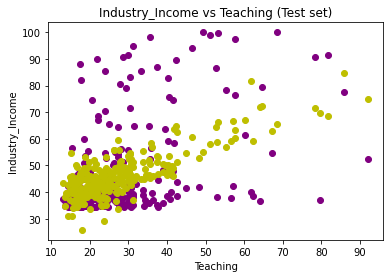

In [28]:
plt.scatter(X_test['Teaching'], y_test, color = 'purple')
plt.plot(X_test['Teaching'], mr_rfe.predict(X_test[f_lm]), 'yo')
plt.title('Industry_Income vs Teaching (Test set)')
plt.xlabel('Teaching')
plt.ylabel('Industry_Income')
plt.show()

## Backward Elimination

Если у нас было бы слтшком много переменных, то метод ниже был бы спасением, так как он автоматически отбирает нужные переменные.

In [29]:
def backwardElimination(x, y, sl):
    x = sm.add_constant(x)
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = x.drop(x.columns[j], axis=1)
    regressor_OLS.summary()
    return x

SL = 0.1
X_Modeled = backwardElimination(X_train, y_train, SL)

Получили такой же коэффициент детерминации.

In [30]:
mr_be = LinearRegression().fit(X_Modeled, y_train)

mr_be.score(X_Modeled, y_train).round(3)

0.285

### Промежуточный вывод: множественная линейная регрессия была построена на 5 наиболее значимых переменных (Numb_students_per_Staff,Percentage_Female,Percentage_Male,Teaching,GDP), поэтому логично, что она уже лушче описывает наши данные, имеет коэффициент детеерминации выше аж на 10%, ниже среднеквадратические ошибки, но является более переобученной. 

!pip install statsmodels

## Полиномиальная регрессия

Пробуем ещё один тип регрессии.

In [31]:
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train_p, y_train)

pr.coef_, pr.intercept_

(array([-2.86260876e+05,  1.34627393e-03, -3.98762432e-02, -1.69599072e-03,
        -1.12847558e+01, -1.81968545e+01,  5.90589504e-01, -4.06535906e-01,
         7.89714026e-04, -7.02145709e-09, -3.45231806e-06,  8.24333210e-08,
        -1.29070149e-03,  4.74769556e-04, -3.75929133e-06, -5.51135938e-06,
        -8.88357231e-09, -6.98197006e-03, -2.57973860e-05,  8.11954891e-02,
         2.20025415e-01,  2.18177785e-02,  4.42081256e-03, -4.73048299e-06,
        -4.39210533e-07,  3.35624339e-03,  4.77344031e-03, -1.09718093e-05,
        -1.58553835e-05,  2.38546929e-08,  6.81973502e+00, -1.81044883e+01,
        -8.56031197e-01,  3.24743723e-01,  9.75696168e-05, -9.23649372e-02,
         9.51909335e-01,  9.61966799e-02, -5.36270942e-04, -7.79348998e-03,
         8.15508598e-03, -4.03591894e-06,  2.44067936e-03, -6.90640372e-06,
         4.31283328e-11]),
 286287.922914329)

Удалось увеличить коэффициет детерминации.

In [33]:
y_pred = pr.predict(X_test_p)

pr.score(X_train_p, y_train).round(3)

0.36

Модель стала более переобученной, но среднеквадратическая ошибка по обучающей выборке ещё немного снизилась.

In [34]:
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(12.92, 15.26)

Визуализация.

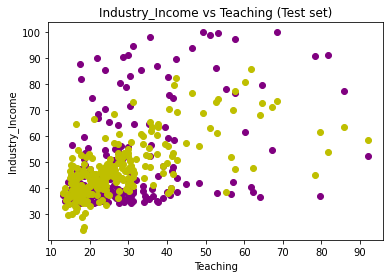

In [35]:
plt.scatter(X_test['Teaching'], y_test, color = 'purple')
plt.plot(X_test['Teaching'], pr.predict(X_test_p), 'yo')
plt.title('Industry_Income vs Teaching (Test set)')
plt.xlabel('Teaching')
plt.ylabel('Industry_Income')
plt.show()

### Промежуточный вывод: полиномиальная регрессия пока выглядит самой привлекательной для нашего исследования, так как имеет самый высокий коэффициент детерминации и самую низкую среднеквадратическую ошибку на обучающей выборке. Да, я знаю, что далеко не всегда большие датасеты требуют сложных моделей, но мне кажется, что в нашем случае необходимы более интересные методы, чем те, что были рассмотрены выше.

## Консервирование

In [37]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()